The following experimenting is based on https://github.com/pygae/clifford/blob/master/docs/ConformalGeometricAlgebra.ipynb ( see it at https://nbviewer.jupyter.org/github/pygae/clifford/blob/master/docs/ConformalGeometricAlgebra.ipynb )

In [1]:
!pip install clifford
!pip install matplotlib

You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from IPython.display import display, Math, Latex, Markdown

In [133]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [120]:
def str_ga(*gas, expand_wedge=False):
    rets = []
    for ga in gas:
        ret = []
        first = True
        for i, v in enumerate(ga.value):
            if not first:
                if v > 0:
                    ret.append(' + ')
            if v < 0:
                ret.append(' - ')
            if v != 0:
                v = abs(v)
                blade_tuple = ga.layout.bladeTupList[i]
                if blade_tuple != ():
                    if v != 1:
                        ret.append('%g ' % v)
                    if expand_wedge:
                        ret.append(' \\wedge '.join([ ('e_%d' % base) for base in blade_tuple ]))
                    else:
                        ret.append('e_{%s}' % ''.join([ ('%d' % base) for base in blade_tuple ]))
                else:
                    ret.append('%g ' % v)
                first = False
        if ret == []:
            ret.append('0')
        rets.append('%s' % ''.join(ret))
    return rets

In [108]:
def print_ga(*gas, expand_wedge=False):
    for ga_latex in str_ga(*gas, expand_wedge=False):
        display(Math(ga_latex))

Conformal Geometric Algebra (CGA) is a projective geometry tool which allows conformal transformations to be implemented with rotations.   To do this,  the original geometric algebra is extended by two dimensions, one of positive signature $e_+$ and one of negative signature $e_-$. Thus, if we started with $G_p$,  the conformal algebra is  $G_{p+1,1}$.

It is convenient to define a *null* basis given by 

$$e_{o} = \frac{1}{2}(e_{-} -e_{+})\\e_{\infty} = e_{-}+e_{+}$$

A vector in the original space $x$ is *up-projected* into a conformal vector $X$  by 

$$X = x + \frac{1}{2} x^2 e_{\infty} +e_o $$


To map a conformal vector back into a vector from the original space, the vector is first normalized, then rejected from the minkowski plane $E_0$,


$$ X = \frac{X}{X \cdot e_{\infty}}$$

then 

$$x = X \wedge E_0\, E_0^{-1}$$


To implement this in `clifford`  we could create a CGA by instantiating the it directly, like `Cl(3,1)`  for example, and then making the definitions and maps described above relating the various subspaces. Or, we you can use the helper function `conformalize()`. 

To demonstrate we will conformalize $G_2$, producing a CGA of $G_{3,1}$.

In [4]:
from numpy import pi,e
from clifford import Cl, conformalize

G2, blades_g2 = Cl(2)

blades_g2

{'e1': (1^e1), 'e2': (1^e2), 'e12': (1^e12)}

In [5]:
G2c, blades_g2c, stuff = conformalize(G2)

blades_g2c   #inspect the CGA blades

{'e1': (1^e1),
 'e2': (1^e2),
 'e3': (1^e3),
 'e4': (1^e4),
 'e12': (1^e12),
 'e13': (1^e13),
 'e14': (1^e14),
 'e23': (1^e23),
 'e24': (1^e24),
 'e34': (1^e34),
 'e123': (1^e123),
 'e124': (1^e124),
 'e134': (1^e134),
 'e234': (1^e234),
 'e1234': (1^e1234)}

In [6]:
print_ga(blades_g2c['e4'])

<IPython.core.display.Math object>

In [7]:
stuff

{'ep': (1^e3),
 'en': (1^e4),
 'eo': -(0.5^e3) + (0.5^e4),
 'einf': (1^e3) + (1^e4),
 'E0': (1.0^e34),
 'up': <function clifford.conformalize.<locals>.up(x)>,
 'down': <function clifford.conformalize.<locals>.down(x)>,
 'homo': <function clifford.conformalize.<locals>.homo(x)>,
 'I_ga': (1.0^e12)}

It contains the following:

* `ep` - postive basis vector added
* `en` - negative basis vector added
* `eo` - zero vecror of null basis (=.5*(en-ep))
* `einf` - infinity vector of null basis (=en+ep)
* `E0` - minkowski bivector (=einf^eo)
* `up()` - function to up-project a vector from GA to CGA
* `down()` - function to down-project a vector from CGA to GA
* `homo()` - function ot homogenize a CGA vector

![](http://clifford.readthedocs.io/en/latest/_static/conformal%20space.svg)

In [8]:
locals().update(blades_g2c)
locals().update(stuff)

In [9]:
x = e1+e2

In [10]:
print_ga(x)

<IPython.core.display.Math object>

In [11]:
print_ga(up(x))

<IPython.core.display.Math object>

In [12]:
print_ga(down(up(x)))

<IPython.core.display.Math object>

In [13]:
a= 1*e1 + 2*e2
b= 3*e1 + 4*e2

In [14]:
print_ga(a, b)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
print_ga(down(ep*up(a)*ep), a.inv())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [16]:
print_ga(down(E0*up(a)*E0), -a)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Dilations

$$D_{\alpha}  =  e^{-\frac{\ln{\alpha}}{2} \,E_0} $$

$$D_{\alpha} \, X \, \tilde{D_{\alpha}} $$

In [17]:
from scipy import rand,log

D = lambda alpha: e**((-log(alpha)/2.)*(E0)) 
alpha = rand()
print_ga(down( D(alpha)*up(a)*~D(alpha)), (alpha*a))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Translations

$$ V = e ^{\frac{1}{2} e_{\infty} a } = 1 + e_{\infty}a$$

In [18]:
T = lambda x: e**(1/2.*(einf*x)) 
print_ga(down( T(a)*up(b)*~T(a)), b+a)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [19]:
from pprint import pprint

In [20]:
pprint(vars(einf))

{'layout': Layout([1, 1, 1, -1], [(), (1,), (2,), (3,), (4,), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (1, 2, 3), (1, 2, 4), (1, 3, 4), (2, 3, 4), (1, 2, 3, 4)], firstIdx=1, names=['', 'e1', 'e2', 'e3', 'e4', 'e12', 'e13', 'e14', 'e23', 'e24', 'e34', 'e123', 'e124', 'e134', 'e234', 'e1234']),
 'value': array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}


In [21]:
print_ga(ep, en, eo)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Transversions

A transversion is an inversion,  followed by a translation, followed by a inversion. The verser is 

$$V= e_+ T_a e_+$$

which is recognised as the translation bivector reflected in the $e_+$ vector. From the diagram, it is seen that this is equivalent to the bivector in $x\wedge e_o$,

$$ e_+ (1+e_{\infty}a)e_+ $$

$$ e_+^2 + e_+e_{\infty}a e_+$$
$$2 +2e_o a$$

the factor of 2 may be dropped, because the conformal vectors are null


In [22]:
V = ep * T(a) * ep
assert ( V == 1+(eo*a))

K = lambda x: 1+(eo*a) 

B= up(b)
print_ga( down(K(a)*B*~K(a)) , 1/(a+1/b) ) 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [23]:
print_ga(a, 1/a)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [24]:
print_ga(e1,e2, e1 | e2, e1^e2, e1 * e2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [25]:
print_ga(a,b, a | b, a^b, a * b)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

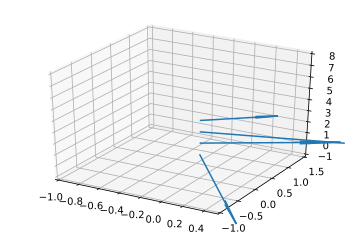

In [134]:
soa = np.array([[0, 0, 1, 1, -2, 0], [0, 0, 2, 1, 1, 0],
                [0, 0, 3, 2, 1, 0], [0, 0, 4, 0.5, 0.7, 0]])

X, Y, Z, U, V, W = zip(*soa)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-1, 0.5])
ax.set_ylim([-1, 1.5])
ax.set_zlim([-1, 8])
plt.show()

In [35]:
print_ga(a)

<IPython.core.display.Math object>

In [90]:
def to_vector(ga, max=-1):
    vec = [ ga.value[i] for i, t in enumerate(ga.layout.bladeTupList) if len(t) == 1 ]
    max = len(vec) if max == -1 else max
    return vec[0:max]

In [55]:
[ a.value[i] for i, t in enumerate(a.layout.bladeTupList) if len(t) == 1 ]

[1, 2, 0, 0]

In [68]:
to_vector(a)

[1, 2, 0, 0]

In [67]:
to_vector(a, max=2)

[1, 2]

In [152]:
def plot_as_vector(*gas):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    l = len(gas)
    # print_ga(*gas)
    arr = [to_vector(ga, max=3) for ga in gas]
    soa = np.array(arr)
    ga_latexes = str_ga(*gas)
    for i, v in enumerate(arr):
        ax.text(v[0], v[1], v[2], ('$ %s $' % ga_latexes[i]))
    # print(soa)
    X, Y, Z = np.zeros(l), np.zeros(l), np.zeros(l)
    U, V, W = [list(a) for a in zip(*soa)]
    # print(X, Y, Z, U, V, W)
    ax.quiver(X, Y, Z, U, V, W)
    xlim = max(abs(min(U)), abs(max(U)), 2)
    ylim = max(abs(min(V)), abs(max(V)), 2)
    zlim = max(abs(min(W)), abs(max(W)), 2)
    ax.set_xlim([-xlim, xlim])
    ax.set_ylim([-ylim, ylim])
    ax.set_zlim([-zlim, zlim])

#     ax.set_xlim([-1, 0.5])
#     ax.set_ylim([-1, 1.5])
#     ax.set_zlim([-1, 8])
    plt.show()

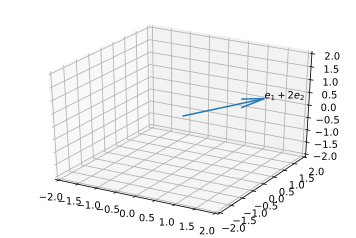

In [153]:
plot_as_vector(a)

### Reflections

$$ -mam^{-1}  \rightarrow MA\tilde{M}  $$

In [29]:
m = 5*e1 + 6*e2
n = 7*e1 + 8*e2


print_ga(down(m*up(a)*m), -m*a*m.inv())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [156]:
str_ga(a, m, down(m*up(a)*m))

['e_{1} + 2 e_{2}', '5 e_{1} + 6 e_{2}', ' - 1.78689 e_{1} - 1.34426 e_{2}']

In [157]:
print_ga(a, m, down(m*up(a)*m))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

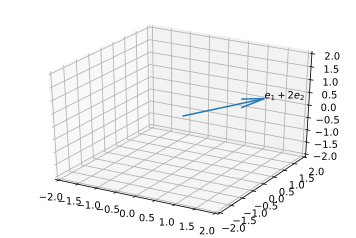

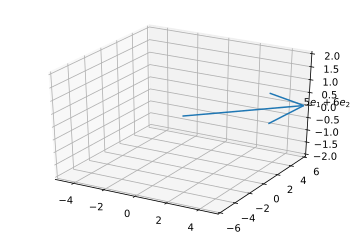

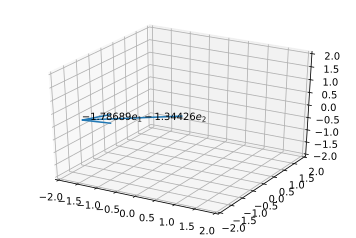

In [158]:
plot_as_vector(a)
plot_as_vector(m)
plot_as_vector(down(m*up(a)*m))

### Rotations

$$ mnanm = Ra\tilde{R} \rightarrow RA\tilde{R}  $$

In [160]:
R = lambda theta: e**((-.5*theta)*(e12))
theta = pi/2
print_ga(down( R(theta)*up(a)*~R(theta)))
print_ga(R(theta)*a*~R(theta))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

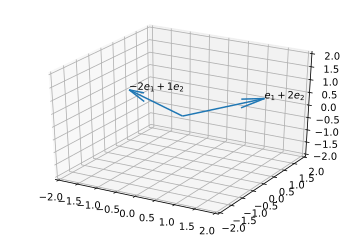

In [163]:
plot_as_vector(a, down( R(theta)*up(a)*~R(theta)))

In [166]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [170]:
def plot_rotate(origin, theta=pi/2):
    R = lambda theta: e**((-.5*theta)*(e12))
    rotated = (down( R(theta)*up(origin)*~R(theta)))
    plot_as_vector(origin, rotated)

interactive_plot = interactive(plot_rotate, origin=fixed(a), theta=(0, 2 * pi, 0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=1.5707963267948966, description='theta', max=6.283185307179586), Outpu…

As a simple example consider the combination  operations of translation,scaling, and inversion. 

$$b=-2a+e_0 \quad \rightarrow \quad B= (T_{e_0}E_0 D_2) A \tilde{ (D_2 E_0 T_{e_0})} $$

In [172]:
A = up(a)
V = T(e1)*E0*D(2)
B = V*A*~V
assert(down(B) == (-2*a)+e1 )

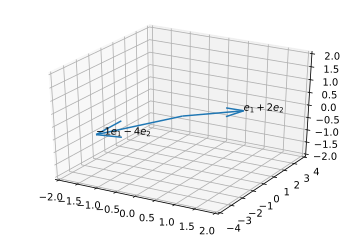

In [173]:
plot_as_vector(a, down(B))

### Transversion

A transversion may be built from a inversion, translation, and inversion. 

$$c = (a^{-1}+b)^{-1}$$

In conformal GA, this is accomplished by 

$$C = VA\tilde{V}$$

$$V= e_+ T_b e_+$$

In [174]:
A = up(a)
V = ep*T(b)*ep
C = V*A*~V
assert(down(C) ==1/(1/a +b))

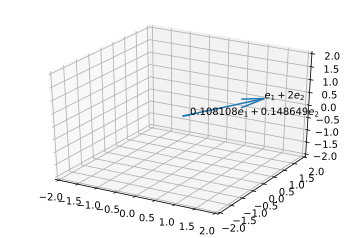

In [175]:
plot_as_vector(a, down(C))